In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn import datasets
warnings.filterwarnings("ignore")

In [6]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

#merubah nama kolom agar mudah
df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 
                   'petal width (cm)': 'petal_width'}, inplace=True)

# Map target integers to species names
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [14]:
df[['sepal_length','sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


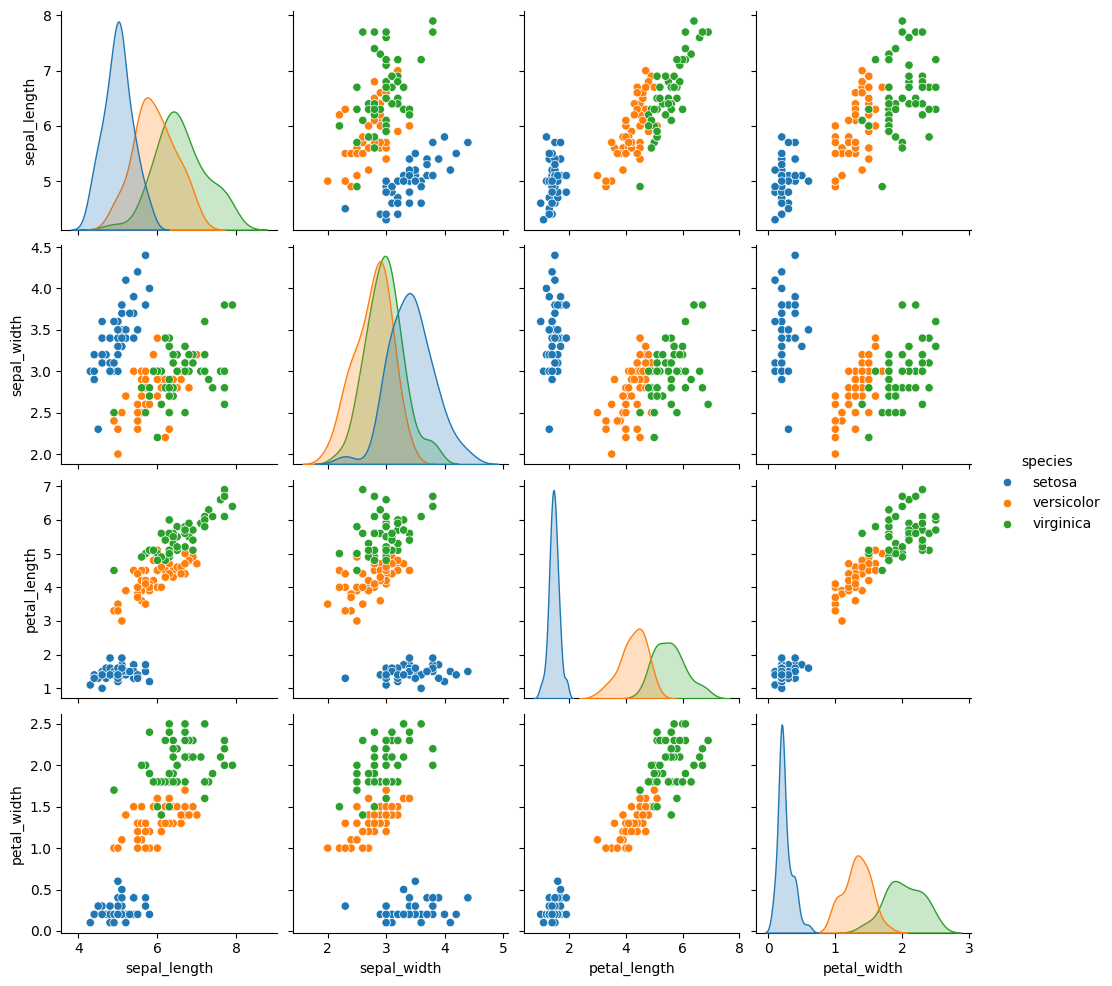

In [15]:
sns.pairplot(df[['sepal_length','sepal_width', 'petal_length', 'petal_width', 'species']], hue='species')

In [ ]:
df = df.drop(['target', 'species'], axis=1)

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# ELBOW METHOD

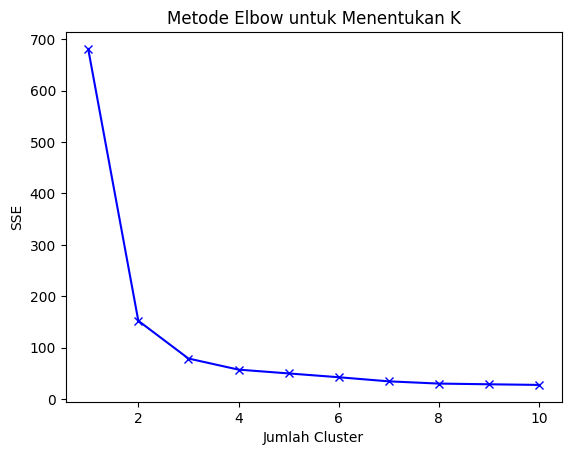

In [20]:
sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [21]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(df)
    distortions.append(km.inertia_)
    # Inertia is the sum of squared distances of samples to their closest cluster center.

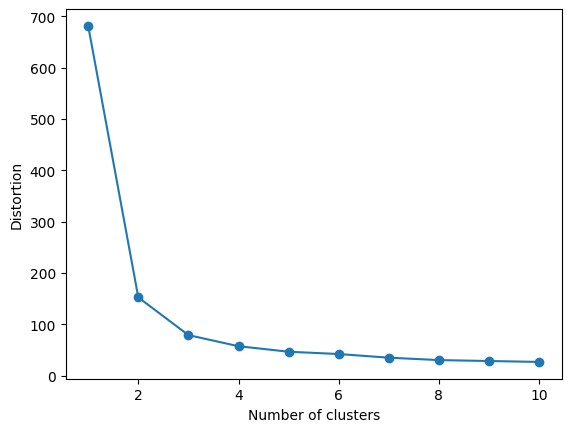

In [22]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3, 1000000), xytext=(3.1, 2000000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 2 (probably 3 can be better)

In [23]:
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
cluster = km.fit_predict(df)

In [25]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'centroid pada fitur 3 (sumbu z)':km.cluster_centers_[:,2],
    'centroid pada fitur 3 (sumbu aa)':km.cluster_centers_[:,3],
    'cluster':list(range(3))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),centroid pada fitur 3 (sumbu z),centroid pada fitur 3 (sumbu aa),cluster
0,5.006000,3.428000,1.462000,0.246000,0
1,6.850000,3.073684,5.742105,2.071053,1
2,5.901613,2.748387,4.393548,1.433871,2


In [27]:
df['cluster'] = cluster

In [28]:
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


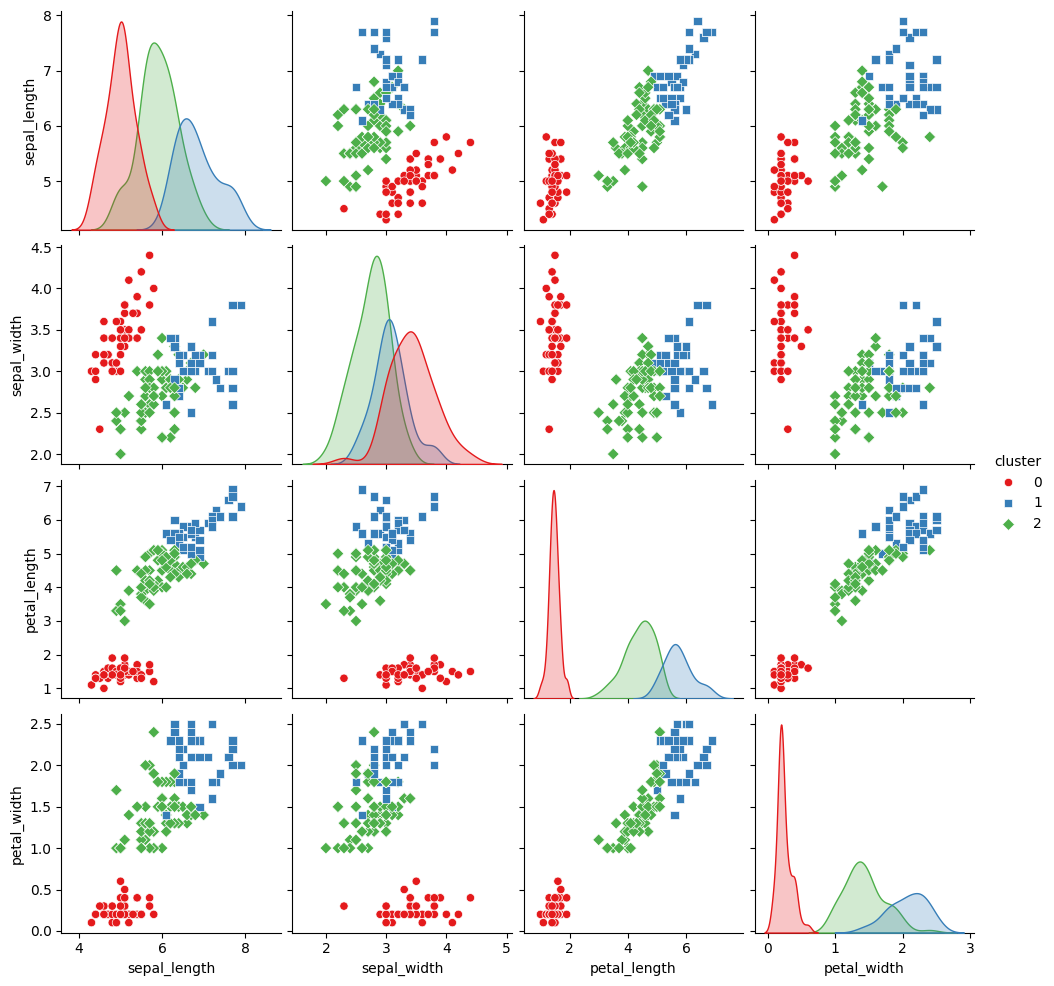

In [29]:
sns.pairplot(df, hue='cluster', palette='Set1', diag_kind='kde', markers=["o", "s", "D"], height=2.5)

In [30]:
from sklearn.cluster import AgglomerativeClustering

# Create and fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['agg_cluster'] = agg_clustering.fit_predict(df.drop('cluster', axis=1))

# Display the updated dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,agg_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


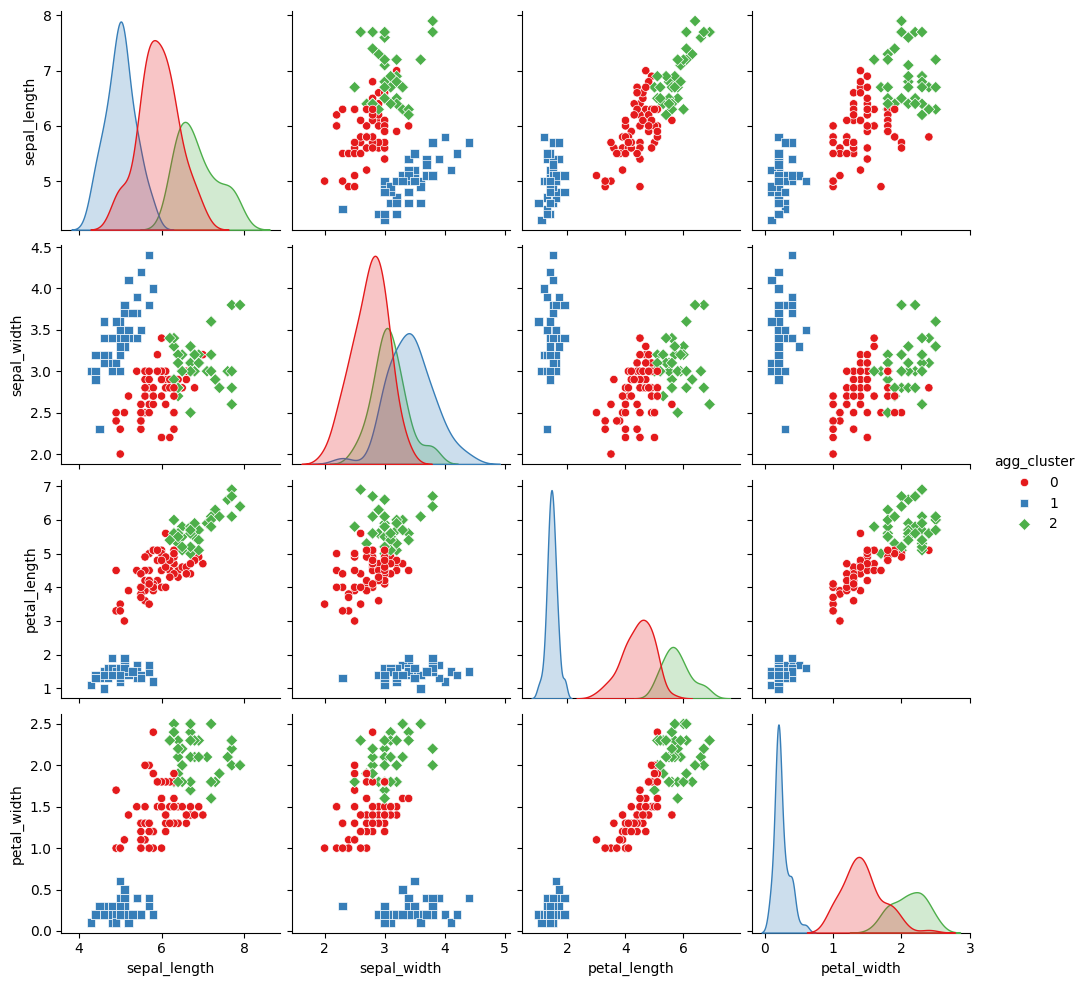

In [33]:
sns.pairplot(df.drop(columns=['cluster']), hue='agg_cluster', palette='Set1', diag_kind='kde', markers=["o", "s", "D"], height=2.5)

In [34]:
from sklearn.cluster import DBSCAN

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df.drop(columns=['cluster', 'agg_cluster']))

# Display the updated dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,agg_cluster,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0


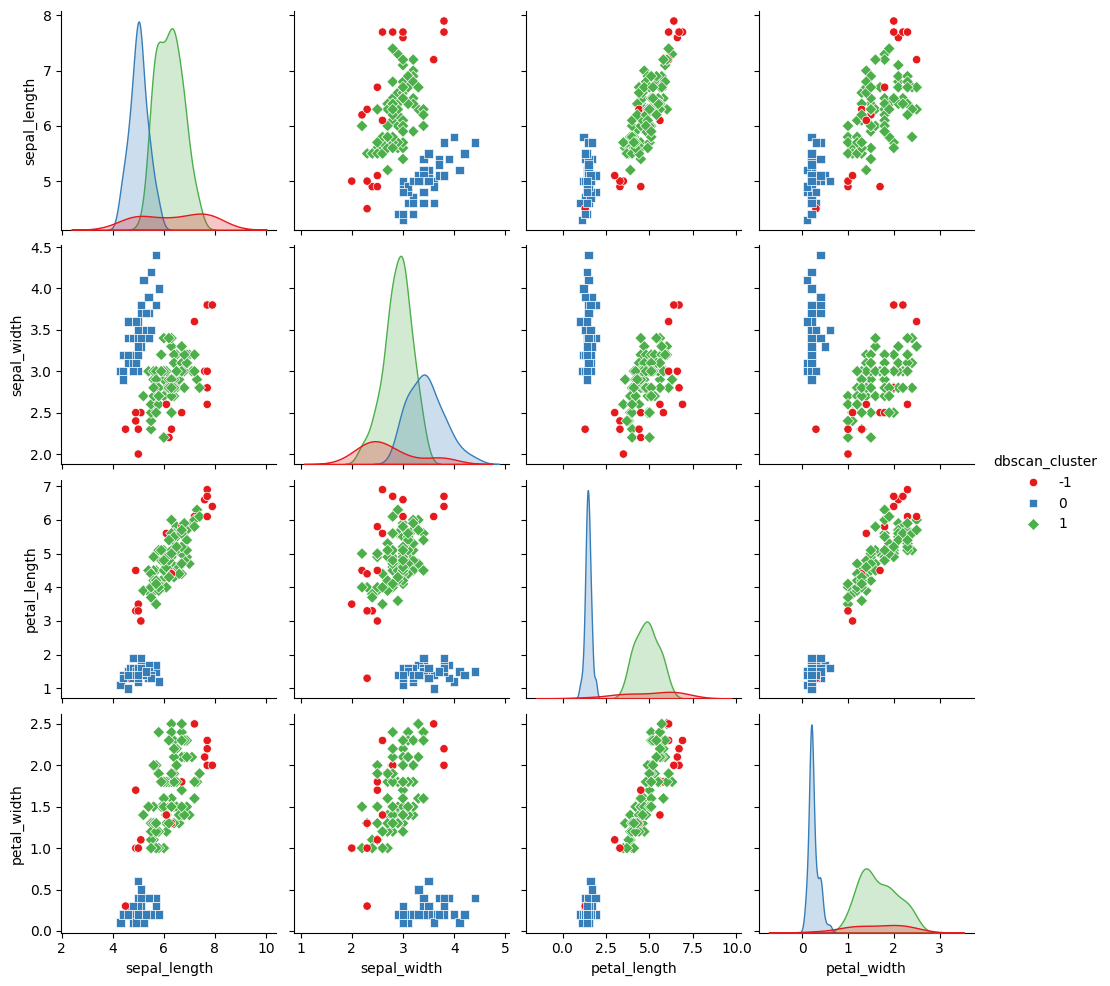

In [35]:
sns.pairplot(df.drop(columns=['cluster', 'agg_cluster']), hue='dbscan_cluster', palette='Set1', diag_kind='kde', markers=["o", "s", "D"], height=2.5)

In [37]:
df

,sepal_length,sepal_width,petal_length,petal_width,cluster,agg_cluster,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,2,1
146,6.3,2.5,5.0,1.9,2,0,1
147,6.5,3.0,5.2,2.0,1,2,1
148,6.2,3.4,5.4,2.3,1,2,1


In [39]:
df.drop(columns=['cluster', 'agg_cluster', 'dbscan_cluster'])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
silhouette_score(df.drop(columns=['cluster', 'agg_cluster', 'dbscan_cluster']), cluster)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans_cluster_labels = df['cluster']
agg_cluster_labels = df['agg_cluster']
dbscan_cluster_labels = df['dbscan_cluster']

# Silhouette Score
silhouette_avg = silhouette_score(df.drop(columns=['cluster', 'agg_cluster', 'dbscan_cluster']), kmeans_cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df.drop(columns=['cluster', 'agg_cluster', 'dbscan_cluster']), agg_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df.drop(columns=['cluster', 'agg_cluster', 'dbscan_cluster']), dbscan_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.5528190123564095
Davies-Bouldin Index: 0.6562564540642021
Calinski-Harabasz Index: 220.29751498443005
